## Import Packages


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore", category=FutureWarning)

## Load Dataset


In [2]:
penguins_df = pd.read_csv("../archive/penguins.csv")

## Examine dataset

In [3]:
# penguins_df
# penguins_df.shape
penguins_df.head(n=10)
# penguins_df.tail(n=10)
# penguins_df.describe
# penguins_df.columns
# penguins_df.isnull().sum()
# penguins_df.dtypes

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE
6,38.9,17.8,181.0,3625.0,FEMALE
7,39.2,19.6,195.0,4675.0,MALE
8,34.1,18.1,193.0,3475.0,NaN
9,42.0,20.2,5000.0,4250.0,MALE


## Dealing with null values and outliers


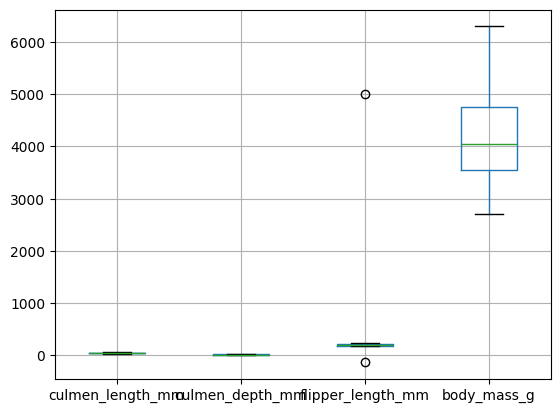

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE


In [4]:
penguins_df.boxplot()
plt.show()
penguins_df = penguins_df.dropna()
penguins_df[penguins_df["flipper_length_mm"] > 4000]
penguins_df[penguins_df["flipper_length_mm"] < 0]

# Näytä ne rivit joissa oli jotai kreisejä arvoja.
# penguins_df.loc[[9, 14]]

penguins_clean = penguins_df.drop([9, 14])
penguins_clean.head()

## Perform preprocessing steps on the dataset to create dummy variables


In [5]:
# df = pd.get_dummies(penguins_clean).drop("sex_.", axis=1)

# # UROKSET
# # Pidetään vain rivit joissa sex on uros.
# df_urokset = penguins_clean.drop(penguins_clean[penguins_clean.sex == 'FEMALE'].index)
# # Vaihdetaan sukupuoli floatiksi.
# df_urokset['sex'] = df_urokset['sex'].map({'MALE': 1.0})
# # täs poistetaan nulliy viel kerran ku vaihettiin sukupuoli floatiks nii ilmeni null.
# df = df_urokset.dropna()
# df.head()

# NAARAAT
# Pidetään vain rivit joissa sex on uros.
df_naaraat = penguins_clean.drop(penguins_clean[penguins_clean.sex == 'FEMALE'].index)
# Vaihdetaan sukupuoli floatiksi.
df_naaraat['sex'] = df_naaraat['sex'].map({'MALE': 0.0})
# täs poistetaan nulliy viel kerran ku vaihettiin sukupuoli floatiks nii ilmeni null.
df = df_naaraat.dropna()
df.head()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,0.0
5,39.3,20.6,190.0,3650.0,0.0
7,39.2,19.6,195.0,4675.0,0.0
13,38.6,21.2,191.0,3800.0,0.0
17,42.5,20.7,197.0,4500.0,0.0


## Perform preprocessing steps on the dataset - scaling


In [6]:
scaler = StandardScaler()
X = scaler.fit_transform(df)
penguins_preprocessed = pd.DataFrame(data=X, columns=df.columns)
penguins_preprocessed.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,-1.288334,0.448462,-1.619419,-1.011440,0.0
1,-1.250565,1.477363,-1.000399,-1.138416,0.0
2,-1.269450,0.935836,-0.656499,0.163092,0.0
3,-1.382757,1.802279,-0.931619,-0.947951,0.0
4,-0.646259,1.531515,-0.518939,-0.059116,0.0
5,0.014701,1.964737,-0.725279,-0.440046,0.0
6,-1.552718,0.448462,-1.688199,-1.201904,0.0
7,-1.458295,0.123546,-1.344299,-0.757487,0.0
8,-1.344988,-0.363828,-1.688199,-0.947951,0.0
9,-1.005066,0.394309,-1.481859,-1.265392,0.0


## PCA version

In [7]:
# pca = PCA(n_components=None)
# dfx_pca = pca.fit(penguins_preprocessed)
# dfx_pca.explained_variance_ratio_
# n_components = sum(dfx_pca.explained_variance_ratio_ > 0.1)
# pca = PCA(n_components=n_components)
# penguins_PCA = pca.fit_transform(penguins_preprocessed)
# print(n_components)



## Detect the optimal number of clusters for k-means clustering

# inertia = []
# for k in range(1, 10):
#     kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_PCA)
#     inertia.append(kmeans.inertia_)
# plt.plot(range(1, 10), inertia, marker="o")
# plt.xlabel("Number of clusters")
# plt.ylabel("Inertia")
# plt.title("Elbow Method")
# plt.show()
# n_clusters = 4

## Run the k-means clustering algorithm

# kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_PCA)
# plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_, cmap="viridis")
# plt.xlabel("First Principal Component")
# plt.ylabel("Second Principal Component")
# plt.title(f"K-means Clustering (K={n_clusters})")
# plt.show()

## Detect the optimal number of clusters for k-means clustering

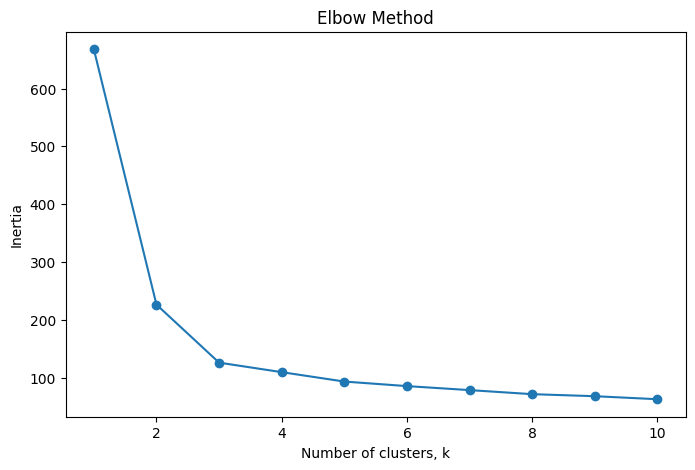

In [8]:
# Suoritetaan k-Means eri klusterimäärillä
inertias = []
K = range(1, 11)  # Testataan klusterimäärät 1-10
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(penguins_preprocessed)
    inertias.append(kmeans.inertia_)

# Piirretään kyynärpääkaavio
plt.figure(figsize=(8, 5))
plt.plot(K, inertias, marker='o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

## Run the k-means clustering algorithm


In [9]:
# testaa eri arvoilla ja ota kuvia d:D
optimal_k = 4  # Esimerkki: vaihda tämä löytämääsi arvoon

# Suoritetaan k-Means klusterointi
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(penguins_preprocessed)

# Tallennetaan klusterit datan yhteyteen
penguins_preprocessed['Cluster'] = clusters

# Tarkastellaan klustereita
# print(penguins_preprocessed.head())
print(penguins_preprocessed['Cluster'].value_counts())

Cluster
1    61
0    41
3    34
2    31
Name: count, dtype: int64


## Centroidit

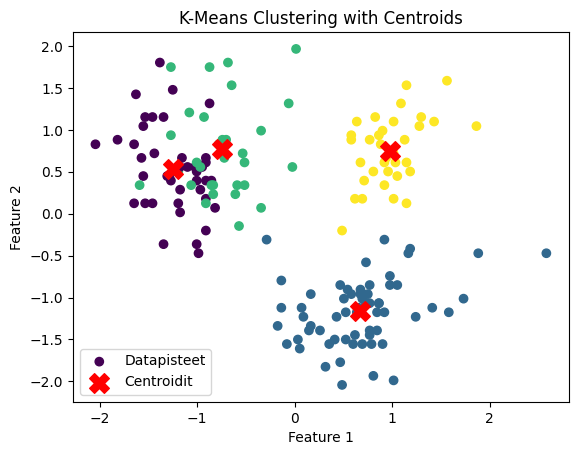

In [10]:
# Esimerkki 2D-visualisoinnista, valitaan kaksi ensimmäistä muuttujaa
plt.scatter(penguins_preprocessed.iloc[:, 0], 
            penguins_preprocessed.iloc[:, 1], 
            c=clusters, cmap='viridis', marker='o', label='Datapisteet')

# Klusterikeskukset (centroids) - piirretään punaisina x-merkkeinä
centroids = kmeans.cluster_centers_

# Piirretään centroidit (klusterikeskukset) punaisella värillä
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroidit')

plt.title('K-Means Clustering with Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


## k-Means looppi eri k arvoilla

Cluster
0    65
1    61
2    41
Name: count, dtype: int64


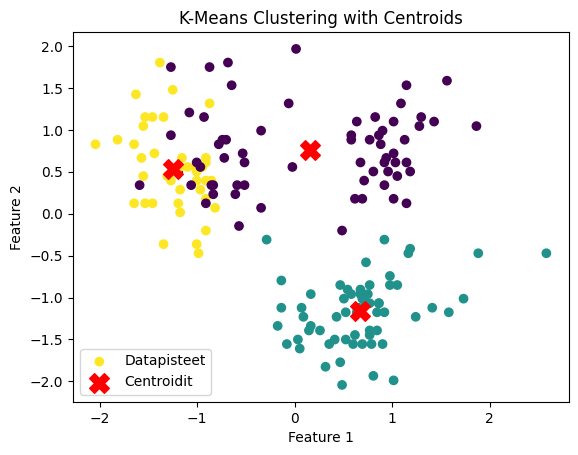

Cluster
1    61
2    41
3    34
0    31
Name: count, dtype: int64


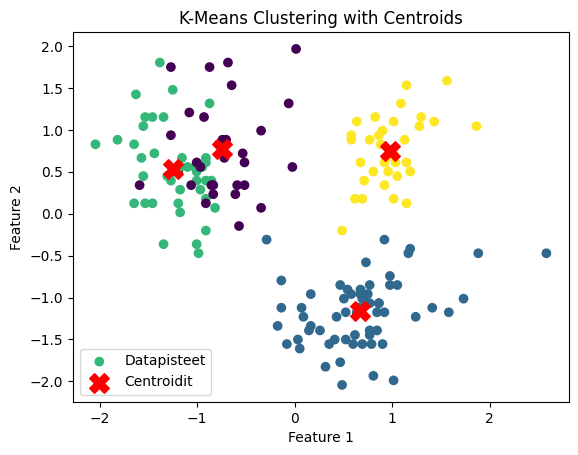

Cluster
1    61
2    41
3    34
0    18
4    13
Name: count, dtype: int64


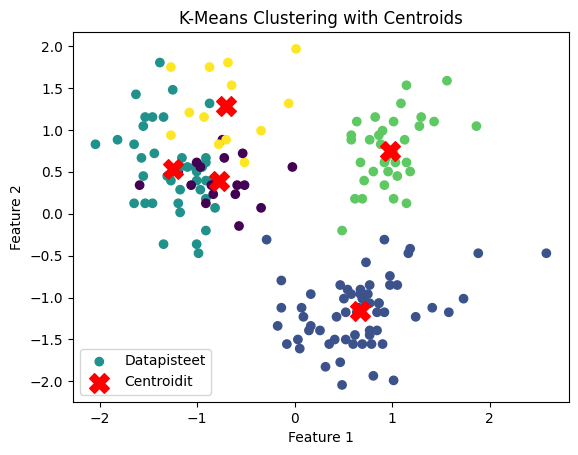

Cluster
1    61
3    34
5    28
0    18
4    13
2    13
Name: count, dtype: int64


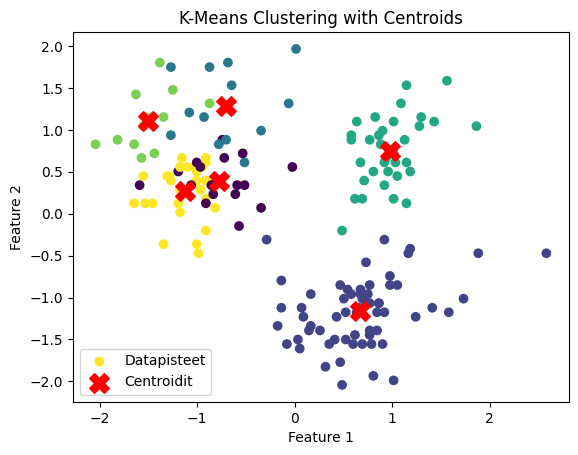

In [11]:

# Suoritetaan k-Means klusterointi
K = range(3, 7)  # Testataan klusterimäärät 1-10
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(penguins_preprocessed)
    penguins_preprocessed['Cluster'] = clusters
    print(penguins_preprocessed['Cluster'].value_counts())

    # Esimerkki 2D-visualisoinnista, valitaan kaksi ensimmäistä muuttujaa
    plt.scatter(penguins_preprocessed.iloc[:, 0], 
                penguins_preprocessed.iloc[:, 1], 
                c=clusters, cmap='viridis', marker='o', label='Datapisteet')

    # Klusterikeskukset (centroids) - piirretään punaisina x-merkkeinä
    centroids = kmeans.cluster_centers_

    # Piirretään centroidit (klusterikeskukset) punaisella värillä
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroidit')

    plt.title('K-Means Clustering with Centroids')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

